In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

## step=4

In [2]:
step = 4
N = 1000
train_size = 800

In [3]:
x=np.arange(0,N)
# t=np.arange(0,N)
# #x=np.cos(0.05*t)+np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,0
1,1
2,2
3,3
4,4


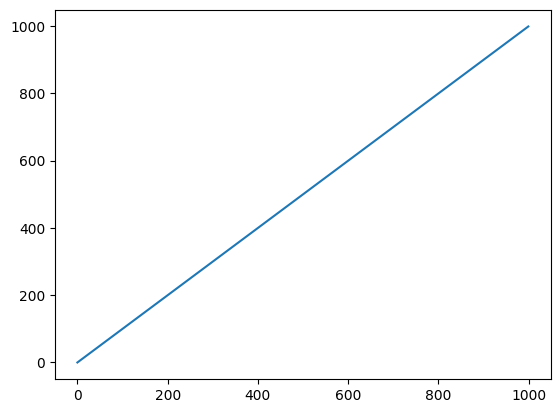

In [4]:
plt.plot(df)
plt.show()

In [5]:
values=df.values
train,test = values[0:train_size], values[train_size:N]

In [6]:
train

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [7]:
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [8]:
train

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d])
 return np.array(X), np.array(Y)

# def convertToMatrix(data, step):
#     X, Y =[], []
#     for i in range(len(data)-step):
#         d=i+step
#         if(i<step-1):
#             X.append([0]*step)
#             Y.append(0)
#         else:
#             X.append(data[i:d,])
#             Y.append(data[d,])
#     return np.array(X), np.array(Y)

In [10]:
x_train,y_train =convertToMatrix(train,step)
x_test,y_test =convertToMatrix(test,step)


In [11]:
x_train

array([[  0,   1,   2,   3],
       [  1,   2,   3,   4],
       [  2,   3,   4,   5],
       ...,
       [797, 798, 799, 799],
       [798, 799, 799, 799],
       [799, 799, 799, 799]])

In [16]:
trainX = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
testX = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [17]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', metrics=['acc'],optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(trainX,y_train, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
50/50 - 1s - loss: 3283.0347 - acc: 0.0000e+00 - 1s/epoch - 29ms/step
Epoch 2/100
50/50 - 0s - loss: 9.2589 - acc: 0.0000e+00 - 100ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 2.1020 - acc: 0.0000e+00 - 101ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 2.0351 - acc: 0.0000e+00 - 102ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 2.0375 - acc: 0.0000e+00 - 101ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 2.0102 - acc: 0.0000e+00 - 101ms/epoch - 2ms/step
Epoch 7/100
50/50 - 0s - loss: 1.9957 - acc: 0.0000e+00 - 100ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 1.9929 - acc: 0.0000e+00 - 98ms/epoch - 2ms/step
Epoch 9/100
50/50 - 0s - loss: 1.9842 - acc: 0.0000e+00 - 95ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 1.9464 - acc: 0.0000e+00 - 100ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 1.9261 - acc: 0.0000e+00 - 95ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 1.9404 - acc: 0.0000e+00 - 99ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - lo

7/7 [==============================] - 0s 2ms/step


In [19]:
df

,0
0,0
1,1
2,2
3,3
4,4
...,...
995,995
996,996
997,997
998,998


In [20]:
predicted

array([[   3.7080386],
       [   4.783452 ],
       [   5.8403826],
       [   6.8401184],
       [   7.8398523],
       [   8.839589 ],
       [   9.839324 ],
       [  10.839058 ],
       [  11.838795 ],
       [  12.838528 ],
       [  13.838262 ],
       [  14.837999 ],
       [  15.837734 ],
       [  16.837467 ],
       [  17.837204 ],
       [  18.836937 ],
       [  19.836672 ],
       [  20.836409 ],
       [  21.836142 ],
       [  22.835878 ],
       [  23.835613 ],
       [  24.83535  ],
       [  25.835081 ],
       [  26.83482  ],
       [  27.834553 ],
       [  28.834288 ],
       [  29.834026 ],
       [  30.83376  ],
       [  31.833492 ],
       [  32.833225 ],
       [  33.832966 ],
       [  34.8327   ],
       [  35.83243  ],
       [  36.83217  ],
       [  37.831905 ],
       [  38.83164  ],
       [  39.83137  ],
       [  40.83111  ],
       [  41.830845 ],
       [  42.830578 ],
       [  43.83032  ],
       [  44.830048 ],
       [  45.829784 ],
       [  4

for i in range(step-1):
    predicted=np.insert(predicted,0,0)
    predicted=predicted[0:-1]

predicted=np.insert(predicted,0,0)
predicted=predicted[0:-1]

In [21]:
predicted

array([[   3.7080386],
       [   4.783452 ],
       [   5.8403826],
       [   6.8401184],
       [   7.8398523],
       [   8.839589 ],
       [   9.839324 ],
       [  10.839058 ],
       [  11.838795 ],
       [  12.838528 ],
       [  13.838262 ],
       [  14.837999 ],
       [  15.837734 ],
       [  16.837467 ],
       [  17.837204 ],
       [  18.836937 ],
       [  19.836672 ],
       [  20.836409 ],
       [  21.836142 ],
       [  22.835878 ],
       [  23.835613 ],
       [  24.83535  ],
       [  25.835081 ],
       [  26.83482  ],
       [  27.834553 ],
       [  28.834288 ],
       [  29.834026 ],
       [  30.83376  ],
       [  31.833492 ],
       [  32.833225 ],
       [  33.832966 ],
       [  34.8327   ],
       [  35.83243  ],
       [  36.83217  ],
       [  37.831905 ],
       [  38.83164  ],
       [  39.83137  ],
       [  40.83111  ],
       [  41.830845 ],
       [  42.830578 ],
       [  43.83032  ],
       [  44.830048 ],
       [  45.829784 ],
       [  4

In [22]:
trainScore = model.evaluate(trainX, y_train, verbose=0)
print(trainScore)

[0.08934957534074783, 0.0]


In [23]:
df.iloc[step:,0]

4        4
5        5
6        6
7        7
8        8
      ... 
995    995
996    996
997    997
998    998
999    999
Name: 0, Length: 996, dtype: int32

In [24]:
predicted[:-(step)]

array([[  3.7080386],
       [  4.783452 ],
       [  5.8403826],
       [  6.8401184],
       [  7.8398523],
       [  8.839589 ],
       [  9.839324 ],
       [ 10.839058 ],
       [ 11.838795 ],
       [ 12.838528 ],
       [ 13.838262 ],
       [ 14.837999 ],
       [ 15.837734 ],
       [ 16.837467 ],
       [ 17.837204 ],
       [ 18.836937 ],
       [ 19.836672 ],
       [ 20.836409 ],
       [ 21.836142 ],
       [ 22.835878 ],
       [ 23.835613 ],
       [ 24.83535  ],
       [ 25.835081 ],
       [ 26.83482  ],
       [ 27.834553 ],
       [ 28.834288 ],
       [ 29.834026 ],
       [ 30.83376  ],
       [ 31.833492 ],
       [ 32.833225 ],
       [ 33.832966 ],
       [ 34.8327   ],
       [ 35.83243  ],
       [ 36.83217  ],
       [ 37.831905 ],
       [ 38.83164  ],
       [ 39.83137  ],
       [ 40.83111  ],
       [ 41.830845 ],
       [ 42.830578 ],
       [ 43.83032  ],
       [ 44.830048 ],
       [ 45.829784 ],
       [ 46.829517 ],
       [ 47.82925  ],
       [ 4

ValueError: x and y must have same first dimension, but have shapes (996,) and (1000, 1)

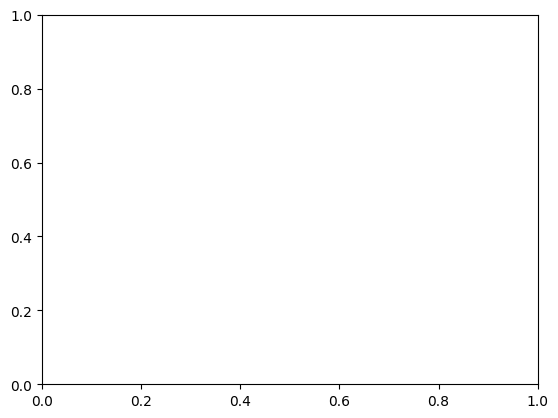

In [28]:
index = df.iloc[step:].index.values
plt.plot(index,df.iloc[step:])
# plt.axis(ymin=-2,ymax=2,xmin=10,xmax=10)
# plt.axis(ymin=-1.2,ymax=-0.75,xmin=300,xmax=320)
plt.plot(index,predicted[:-(step)])
plt.show()

In [26]:
df.head(6)

,0
0,0
1,1
2,2
3,3
4,4
5,5


In [453]:
from sklearn.metrics import r2_score

In [454]:
print(r2_score(predicted[:-(step)],df[step:]))

0.9999956111254675


## step=2,6,8

In [ ]:
step = 2
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.cos(0.05*t)+np.random.rand(N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()

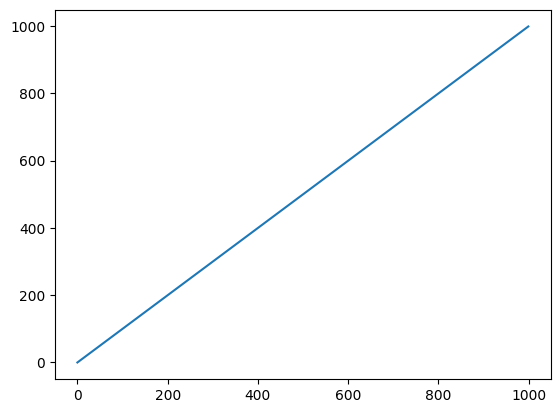

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 32)                1248      
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 - 1s - loss: 11943.8359 - 1s/epoch - 29ms/step
Epoch 2/100
50/50 - 0s - loss: 50.4245 - 106ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 68.7105 - 107ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 84.1303 - 105ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 75.4697 - 102ms/epoch - 2ms/

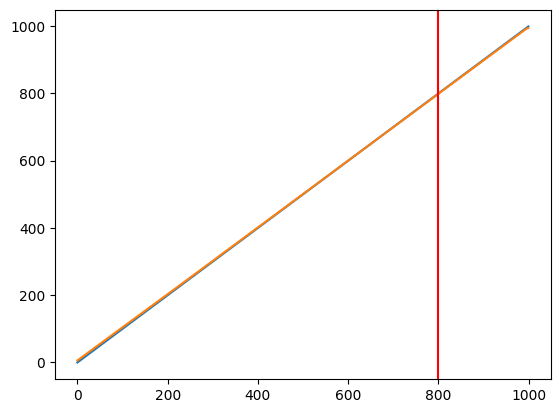

In [30]:
step = 6
N = 1000    
Tp = 800    

x=np.arange(0,N)
#x=np.cos(0.05*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
# plt.axvline(df.index[Tp], c="r")
plt.show()

In [ ]:
step = 8
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.cos(0.05*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()